In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import json
import csv
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [4]:
########################################
#preprocess dataset, get city info 
########################################
business_df = pd.read_csv(open('./output/business.csv'))

cities = business_df.groupby('state').count()
top10cities = cities.business_id.sort_values().keys()[-10:]
print top10cities

#save top 10 cities to separate csv files with only index and businessid
question_dataframe_file = open('./output/city_cluster/ON_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
ON_df = business_df.business_id[business_df['state'] == 'ON']
ON_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/IL_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
IL_df = business_df.business_id[business_df['state'] == 'IL']
IL_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/BW_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
BW_df = business_df.business_id[business_df['state'] == 'BW']
BW_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/WI_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
WI_df = business_df.business_id[business_df['state'] == 'WI']
WI_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/EDH_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
EDH_df = business_df.business_id[business_df['state'] == 'EDH']
EDH_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/PA_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
PA_df = business_df.business_id[business_df['state'] == 'PA']
PA_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/QC_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
QC_df = business_df.business_id[business_df['state'] == 'QC']
QC_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/NC_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
NC_df = business_df.business_id[business_df['state'] == 'NV']
NC_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/NV_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
NV_df = business_df.business_id[business_df['state'] == 'NV']
NV_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/AZ_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
AZ_df = business_df.business_id[business_df['state'] == 'AZ']
AZ_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

Index([u'ON', u'IL', u'BW', u'WI', u'EDH', u'PA', u'QC', u'NC', u'NV', u'AZ'], dtype='object', name=u'state')


In [16]:
ON_df

30398    u9Ns-n_3zaZItaAbxjMidQ
30399    vcwmvs5yM5Tf9vUy74zEhw
30400    FikydBNpLHb7-eHJdwUIDg
30401    pG9JkSvnrnEbdxjyGIXs8g
30402    5awoo-7qHP6LGdcCiLGMkg
30403    Iy0ODOuWkzdwv_Y4xxNmgA
30404    cDAuQLakvPZmiFxCKsX_4g
30405    KOG_SsTlS5EZn6hkCMBDXg
30406    jPfaWUZtRKj3Lo7dNz6Lnw
30407    yfpixV5IGLY6uezjNiM7Ng
30408    0jL1ntxCPwRCCcwIAGOR9g
30409    7hEhc5YSU3W-qLhj-ydU7Q
30410    Emc9Y4pr7ffZMg9Xo90_rg
30411    a3pcSAseslnJxYK5fZdY-g
30412    X8r7YNA2EzoTUUUV8Nn6jw
30413    VtLZT4pz5kq3q5gewHsicQ
30414    s2-DzGfWm0CZ6sQPN1fsnA
30415    0jSLF-sYd23ZUAvXwqHDPg
30416    66XRExJOYvkbKiYfc2JQhg
30417    u0wY6ffKnBs5JNJgGmIG7Q
30418    lfD_34ceqKZtkYQZMWYZHQ
30419    ONrbGB7QorD3TCZWtb4WLg
30420    Ipb_UqP54IjVxg174uT6tw
30421    IORqMMLjr0afaMKnt6tcig
30422    ew1vXK7iwJMuCHWWZAJaGA
30423    Ie8mQW4vXjMXaAay-A3Ntw
30424    VGDEOIhQOFtuSaQMII9ElA
30425    JBu1kh-SIERKThPqIklwdg
30426    eAj2gFXmTejHNIHbFtDhXA
30427    YslVzCJPQoeOwqnYduJlyQ
                  ...          
71877   

In [5]:
########################################
# get checkin data and euc_dist ready for cluster
########################################
dataframe_dict = {}
euc_dist_dict = {}
X_dict = {}
cluster_file = open('./output/checkin total.csv')
checkin_dataframe = pd.read_csv(cluster_file)
count = 0
for name in top10cities:
    city_df = pd.read_csv(open('./output/city_cluster/'+name+'_business.csv', 'r'))
    # filter business within current city from whole dataset
    dataframe_dict[name] = checkin_dataframe[checkin_dataframe['BusinessId'].isin(city_df['BusinessId'].tolist())]
    # calculate euc_dist and save it to dict
    euc_dist_dict[name] = metrics.euclidean_distances(
        dataframe_dict[name].drop(dataframe_dict[name].columns[0:2], axis = 1)
    )
    #drop BusinessId and total in checkin data for each city to test best cluster numbers
    X_dict[name] = dataframe_dict[name].drop(dataframe_dict[name].columns[0:2], axis = 1)

#drop BusinessId and total in checkin data for whole file to test best cluster numbers
X = checkin_dataframe.drop(checkin_dataframe.columns[0:2], axis = 1)

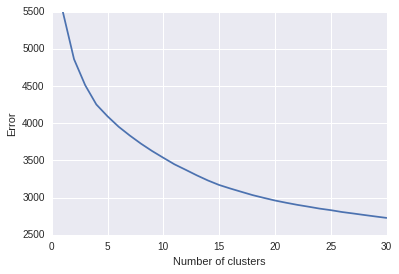

In [10]:
########################################
# test how many clusters is best => 10
########################################
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')

evaluate_clusters(X, 30)

In [15]:
########################################
# cluster SCRATCH
########################################
# kmeans = KMeans(init='k-means++', n_clusters=20, n_init=10)
# kmeans.fit_predict(X)
# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_
# error = kmeans.inertia_

# print "The total error of the clustering is: ", error
# print '\nCluster labels'
# print labels
# print '\n Cluster Centroids'
# print centroids

for X in X_dict.keys():
    kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
    kmeans.fit_predict(X_dict[X])
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    error = kmeans.inertia_
    print X + '==========================='
    print "The total error of the clustering is: ", error
    print '\nCluster labels'
    print labels
    print '\n Cluster Centroids'
    print centroids
    break

ON===========================
The total error of the clustering is:  27.1803051514

Cluster labels
[5 9 9 2 6 4 0 0 2 5 1 9 2 8 0 5 3 3 2 1 9 0 0 2 1 1 5 2 5 4 6 8 9 3 1 1 9
 0 2 3 8 7 6 2 3 2 3 4 6 6 7 3 4 1 9 2 0 9 2 1 3 8 3 1 1 6 1 5 6 2 7 4 2 8
 8 7 1 3 2 3 6 4 4 8 7 2 6 4 4 1 6 3 3 3 1 1 6 4 1 7 7 5 3 4 8 8 4 9 6 4 4
 7 3 4 8 9 5 8 1 1 9 1 1 2 7 4 2 4 5 2 8 7 4 4 7 8 0 8 0 7 9 2 4 3 8 6 9 6
 1 6 6 1 4 6 4 2 1 8 7 6 0 6 2 8 1 7 2 5 0 8 4 7 3 4 6 9 1 8 2 3 3 1 6 0 2
 7 1 4 2 0 1 2 0 1 0 0 0 1 0 8 5 2 8 6 1 2 6 2 1 2 1 5 4 4 7 2 1 7 1 2 1 6
 0 3 2 3 5 7 2 0 0 3 2 1 5 1 2 4 0 3 2 4 7 3 3 2 1 1 3 5 4 2 4 1 0 7 8 0 4
 4 1 3 0 7 3 8 2 8 6 2 7 2 1 2 3 3 0 4 0 0 4 1 7 1 6 2 1 8 8 4 4 8 1 2 0 2
 6 2 8 8 4 4 0 2 2 8 0 0 1 7 0 2 2 4 6 1 1 4 4 1 1 5 1 9 7 1 4 0 2 8 2 0 4
 5 0 2 9 6 5 4 4 2 4 4 9 9 4 7 2 8]

 Cluster Centroids
[[ -6.07153217e-18   3.61111111e-03  -1.73472348e-18   1.41666667e-02
    7.77777778e-03   2.27777778e-02   3.05555556e-02   1.38888889e-02
    6.72222222e-02   3.3666666

In [75]:
temp_list = {}
curr_group = 0
for idx in labels.argsort():
    if labels[idx] == curr_group:
        if str(curr_group) not in temp_list.keys():
            temp_list[str(curr_group)] = [idx]
        else:
            temp_list[str(curr_group)].append(idx)
    else:
        curr_group += 1
        if str(curr_group) not in temp_list.keys():
            temp_list[str(curr_group)] = [idx]
        else:
            temp_list[str(curr_group)].append(idx)
ON_df = pd.read_csv(open('./output/city_cluster/ON_business.csv', 'r'))
# print ON_df
for i in range(0, len(temp_list)):
    plot_list = []
    for idx in temp_list[str(i)]:
        plot_list.append(ON_df.Index[idx])
    print plot_list
    plot_csv(checkin_df, target_list=plot_list)

[52005, 30536, 56085, 30435, 30534, 44990, 55763, 30566, 55509, 30454, 48285, 46243, 48288, 34091, 48467, 34080, 34079, 33734, 53510, 53049, 33472, 30581, 52972, 34546, 46244, 52663, 30419, 46981, 30405, 30404, 30412, 30558, 30420, 49909, 49648, 49935]
55569


IndexError: single positional indexer is out-of-bounds

In [56]:
########################################
#plot specified rows(iloc) from data frame
########################################
def plot_csv(target_df, head = 0, tail = 1, target_list = []):
    sum_list = [0 * 24]
    #get dataframe
    df = target_df
    #check range
    if head not in range(0, len(df)) or head > tail:
        print 'invalid head'
        return
    if tail not in range(0, len(df)):
        print 'invalid tail'
        return
#     for index in target_list:
#         if index not in range(0, len(df)):
#             print 'invalid list'
#             return
    df = df.drop(df.columns[0:2], axis = 1)
    df_dict = {}
    df_dict['hours'] = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10',
          '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19','19-20', '20-21','21-22',
          '22-23', '23-0']
    if target_list != []:
        for i in target_list:
            df_dict[df.index[i]] = np.array(df.iloc[i].tolist())
    else:
        for i in range(head, tail):
            df_dict[df.index[i]] = np.array(df.iloc[i].tolist())
    plot_df = pd.DataFrame(df_dict)
#     plot_df.plot(x = 'hours')
    
    #plot sum
    sum_dict = {}
    sum_plot = np.zeros(24)
    for i in df_dict.keys():
        if i != 'hours':
            sum_plot = np.add(sum_plot, df_dict[i])
    sum_dict['hours'] = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10',
          '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19','19-20', '20-21','21-22',
          '22-23', '23-0']
    sum_dict['avg'] = np.divide(sum_plot, len(df_dict))
    sum_df = pd.DataFrame(sum_dict)
    sum_df.plot(x = 'hours')

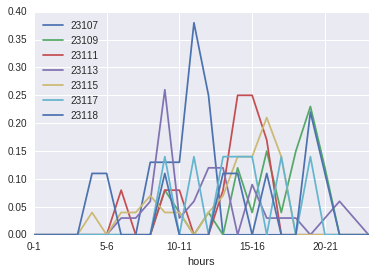

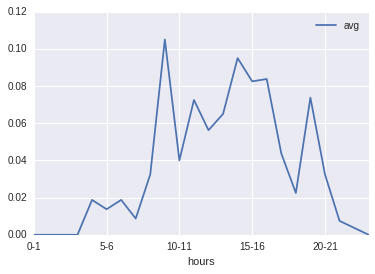

In [48]:
########################################
# test plot function
########################################

#read city business file
#target_df = pd.read_csv(csv_file_name)
target_df = pd.read_csv('./output/city_cluster/ON_business.csv')

#read checkin data
checkin_df = pd.read_csv('./output/checkin.csv')

#filter business in target city
target_df = checkin_dataframe[checkin_dataframe.BusinessId.isin(target_df.BusinessId.tolist())]

#plot specified business in dataframe
# plot_csv(target_df, head = 10, tail = 15)
plot_csv(target_df, target_list = [0, 2, 4, 6, 8, 10, 11])